# Electricity Consumption Analysis

In September 2022, I purchased my first house. The impetus for this project arose when two significant events coincided:

1. The noticeable increase in my electricity bill as winter approached.
2. The accessibility of detailed electricity consumption records in 15-minute intervals, made available online by E-REDES.

This data presented a valuable opportunity to gain insights into my consumption patterns and to identify potential areas for savings. Given the granularity of the data, which is recorded at 15-minute intervals, it quickly becomes apparent that scaling up the analysis is necessary. Therefore, a planned future improvement for this project is a migration from Excel to SQLite3 for enhanced data management and analysis capabilities.

The project comprises five scripts (numbered 1 to 5) that handle data validation, comparison, processing, and analysis, culminating in the generation of informative visualizations.

It's important to note that this project represents a retrospective review, as my initial analysis was conducted around March 2023. Until that time, I was on a SIMPLE tariff plan, where the electricity price remained constant regardless of the day of the week, time of day, or season.

However, in March 2023, I transitioned to a binary weekly tariff plan where both the day and time of consumption impact the cost. Consequently, our household adjusted its behavior by scheduling the operation of appliances during off-peak hours, particularly at night when electricity rates are lower. Appliances such as the dishwasher, laundry machine, and electric water heater were programmed accordingly to take advantage of these cost-saving opportunities.

Now, with this context in mind, let's delve into the data to explore the patterns and insights it holds regarding my electricity consumption behavior.

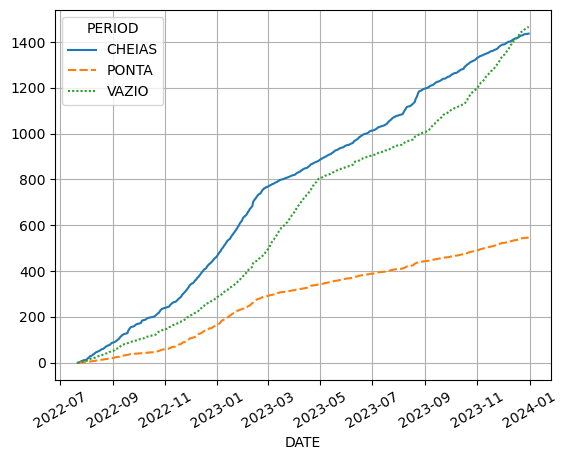

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('../DATA/CRUNCHED/Consumos DAILY.xlsx')

ax = sns.lineplot(pd.pivot_table(data=df, values='kWh', index='DATE', columns='PERIOD').cumsum())
ax.grid()
ax.tick_params(axis='x', rotation=30)
plt.show()

Comments

In [17]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
import pandas as pd

# df = px.data.wind()
# fig = px.scatter_polar(df, r="frequency", theta="direction")
# fig.show()

#fig=px.line(x=[1,2,3,4],y=[1,4,9,16])
# fig = px.line_polar(r=[1,2,3], theta=[1,2,3])#, line_close=True)
# fig.show(renderer='vscode')

df = pd.read_excel('../DATA/ASSIGNED/Consumos MINUTO.xlsx')
pvt = pd.pivot_table(df, values=['kWh'], index=['MONTH', 'TIME'], aggfunc='mean').reset_index()
fig = px.line_polar(pvt, r="kWh", theta="TIME", color='MONTH')
# fig = px.line_polar(pvt, r='kWh', theta='TIME', line_close=True)
# fig.update_traces(fill='toself')
fig.show()

# iplot([fig])

# table = ff.create_table(df.head())
# py.iplot(table, filename='jupyter-table1')

# pvt = pd.pivot_table(
#     data=df,
#     values='kWh',
#     index=['MONTH', 'HOUR'],
#     columns='YEAR',
#     aggfunc='sum'
# )
# sns.lineplot(pvt.loc[(10), 2022])
# sns.lineplot(pvt.loc[(10), 2023])